# Assignment Title: Unsupervised Learning with Dimensionality Reduction and Clustering

**Authors:** Koustab Ghosh<sup>1</sup> & Sujoy Kumar Biswas<sup>2</sup>

**Affiliation**:
1. Researcher, IDEAS-TIH, Indian Statistical Institute, Kolkata
2. Head of Research & Innovation, IDEAS-TIH, Indian Statistical Institute, Kolkata

**Dated**: Sep 07th, 2025


We shall work with the MNIST handwritten digits' image dataset. The details about the dataset is available [here](https://en.wikipedia.org/wiki/MNIST_database).

We need the scikit-learn library to import the various machine leanring models for our study.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

## Question 1. Complete the following lines of code for K-Means clustering

In [ ]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
print(kmeans.cluster_centers_.shape)

(10, 64)


In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(digits.data, clusters)
print(f"Silhouette Score:" , score)

Silhouette Score: 0.18555026309037873


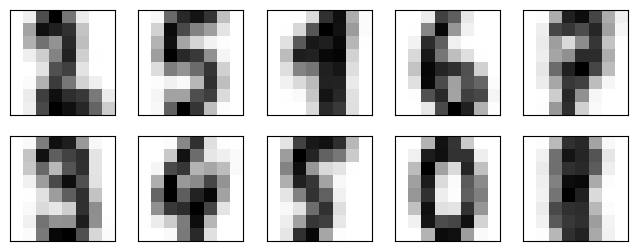

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

We see that even without the labels, KMeans is able to find clusters whose centers are recognizable digits.

Next, we shall apply dimensioanlity reduction of MNIST handwritten datasets with PCA

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

## Question 2. Complete the following lines of code for

Step 1. Dimensionality reduction with PCA. The 8x8=64 dimensional data need to be reduced to 2-dimensional.

Step 2. K-means clustering should be done on the reduced diemnsional data. Initial K value should be set to 10 like before.

Step 3. Visualization code is supplied below.

In [ ]:
# data loading
data = digits.data

# PCA dimensionality reduction
model = PCA(n_components=2)
reduced_data = model.fit_transform(data)

# K-Means clustering with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(reduced_data)

**Data Visualization**

We shall visualize the reduced diemnsion and cluster data (overlapped) with the help of the following code snippet.

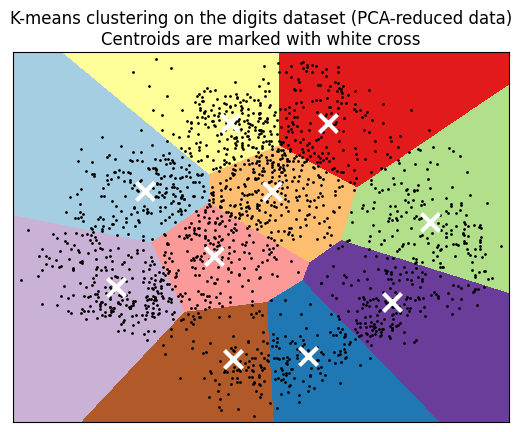

In [ ]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
clusters = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
clusters = clusters.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    clusters,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Question 3.

Find a high dimensional dataset of you choice. Show how you load the dataset. Do the basic exploratory data analysis to become familiar with the dataset.


Here, we use the UCI Human Activity Recognition(HAR) dataset, which contains sensor signals collected from smartphones, while subjects performed daily activities like walking, sitting, lying down, and using stairs.

The dataset is downloaded from the UCI ML repository.

The exploratory data analysis contains:
- Training set shape : 7352 x 561 features
- Test set shape : 2947 x 561 features


In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip -O UCI_HAR_Dataset.zip
!unzip -q UCI_HAR_Dataset.zip

--2025-09-18 16:06:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘UCI_HAR_Dataset.zip’

UCI_HAR_Dataset.zip     [    <=>             ]  58.17M  88.9MB/s    in 0.7s    

2025-09-18 16:06:36 (88.9 MB/s) - ‘UCI_HAR_Dataset.zip’ saved [60999314]



In [ ]:
!ls "UCI HAR Dataset/train/" | head


Inertial Signals
subject_train.txt
X_train.txt
y_train.txt


In [ ]:
import pandas as pd

# Load training data
X_train = pd.read_csv(
    "UCI HAR Dataset/train/X_train.txt",
    delim_whitespace=True, header=None
)
y_train = pd.read_csv(
    "UCI HAR Dataset/train/y_train.txt",
    header=None
)

# Load test data
X_test = pd.read_csv(
    "UCI HAR Dataset/test/X_test.txt",
    delim_whitespace=True, header=None
)
y_test = pd.read_csv(
    "UCI HAR Dataset/test/y_test.txt",
    header=None
)

print("Train features shape:", X_train.shape)
print("Train labels shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


/tmp/ipython-input-2702134251.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(
/tmp/ipython-input-2702134251.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(


Train features shape: (7352, 561)
Train labels shape: (7352, 1)
Test features shape: (2947, 561)
Test labels shape: (2947, 1)


## Question 4.

Next, the objective would be to reduce the dimension of your dataset and do the clustering on it. Complete the following code for clustering in an object-oriented manner. Do the exact process as above: PCA dimension reduction followed by clustering.

A template code is provided below for your guidance.

```

class YourDataClustering:
    def __init__(self, n_clusters=3):
        self.n_clusters = n_clusters
        self.data = ______
        self.labels = ______
        self.kmeans = ______
        self.scaled_data = ______

    def load_data(self):
        """Load the Iris dataset"""
        iris = ________.________()
        self.data = iris.________
        return ________

    def preprocess_data(self):
        """Standardize the dataset"""
        scaler = _________.__________()
        self.scaled_data = scaler.________(________)
        return ________

    def apply_kmeans(self):
        """Apply KMeans clustering"""
        self.kmeans = ________.________(n_clusters=self.n_clusters, random_state=42)
        self.labels = self.kmeans.________(________)
        return ________

    def evaluate_clusters(self):
        """Compute silhouette score"""
        score = ________.________(________, ________)
        print(f"Silhouette Score: {score:.3f}")
        return ________

    def visualize_clusters_matplotlib(self):
        """Visualize clustering result using Matplotlib"""
        plt.scatter(________[:, 0], ________[:, 1], c=________, cmap='viridis')
        plt.title("KMeans Clustering on Iris Dataset (Matplotlib)")
        plt.xlabel("________")
        plt.ylabel("________")
        plt.show()

    def visualize_clusters_opencv(self):
        """Visualize clustering result using OpenCV"""
        canvas = np.ones((______, ______, 3), dtype=np.uint8) * 255
        colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
        scaled = (________[:, :2] * 100 + 250).astype(int)

        for i, point in enumerate(________):
            cv2.circle(canvas, tuple(point), 5, colors[________ % 3], -1)

        cv2.imshow("KMeans Clustering (OpenCV)", ________)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

```

The following code executes all teh parts of teh complete system.

```

  # Step 1: Create clustering object
    clustering = _________(n_clusters=3)

    # Step 2: Load dataset
    data = clustering.________()

    # Step 3: Preprocess dataset
    scaled_data = clustering.________()

    # Step 4: Apply KMeans clustering
    labels = clustering.________()

    # Step 5: Evaluate clusters
    score = clustering.________()

    # Step 6: Visualize with Matplotlib
    clustering.________()

    # Step 7: Visualize with OpenCV
    clustering.________()
  ```

We perform K-means clustering on the HAR dataset after PCA-based dimensionality reduction and visualizes the clusters using both Matplotlib and OpenCV.

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from google.colab.patches import cv2_imshow

class HARDataClustering:
    def __init__(self, n_clusters=6):
        self.n_clusters = n_clusters
        self.data = None
        self.labels = None
        self.kmeans = None
        self.scaled_data = None
        self.reduced_data = None

    def load_data(self):
        """Load HAR dataset"""
        X_train = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
        y_train = pd.read_csv("UCI HAR Dataset/train/y_train.txt", header=None)
        self.data = X_train
        self.true_labels = y_train
        return self.data

    def preprocess_data(self):
        """Standardize + PCA reduce dataset"""
        scaler = StandardScaler()
        self.scaled_data = scaler.fit_transform(self.data)

        pca = PCA(n_components=2)
        self.reduced_data = pca.fit_transform(self.scaled_data)
        return self.reduced_data

    def apply_kmeans(self):
        """Apply KMeans clustering"""
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=0)
        self.labels = self.kmeans.fit_predict(self.reduced_data)
        return self.labels

    def evaluate_clusters(self):
        """Compute silhouette score"""
        score = silhouette_score(self.reduced_data, self.labels)
        print(f"Silhouette Score: {score:.3f}")
        return score

    def visualize_clusters_matplotlib(self):
        """Visualize clustering result using Matplotlib"""
        plt.scatter(self.reduced_data[:, 0], self.reduced_data[:, 1],
                    c=self.labels, cmap='viridis', s=10)
        plt.scatter(self.kmeans.cluster_centers_[:, 0],
                    self.kmeans.cluster_centers_[:, 1],
                    c='red', marker='X', s=200, label="Centroids")
        plt.title("KMeans Clustering on HAR Dataset (PCA Reduced)")
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.legend()
        plt.show()

    def visualize_clusters_opencv(self):
        """Visualize clustering result using OpenCV"""
        canvas = np.ones((500, 500, 3), dtype=np.uint8) * 255
        colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255),
                  (255, 255, 0), (255, 0, 255), (0, 255, 255)]
        scaled = (self.reduced_data - self.reduced_data.min(axis=0)) / \
                 (self.reduced_data.max(axis=0) - self.reduced_data.min(axis=0))
        scaled = (scaled * 400 + 50).astype(int)

        for i, point in enumerate(scaled):
            cv2.circle(canvas, tuple(point), 3, colors[self.labels[i] % len(colors)], -1)

        cv2_imshow(canvas)


/tmp/ipython-input-35391848.py:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)


Silhouette Score: 0.479


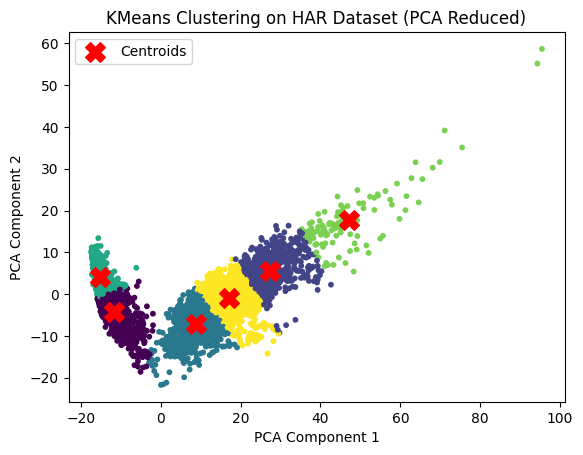

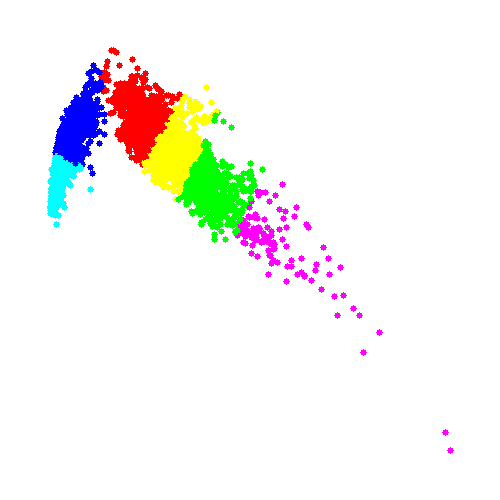

In [ ]:
# Step 1: Create clustering object
clustering = HARDataClustering(n_clusters=6)

# Step 2: Load dataset
data = clustering.load_data()

# Step 3: Preprocess dataset (scaling + PCA)
reduced_data = clustering.preprocess_data()

# Step 4: Apply KMeans clustering
labels = clustering.apply_kmeans()

# Step 5: Evaluate clusters
score = clustering.evaluate_clusters()

# Step 6: Visualize with Matplotlib
clustering.visualize_clusters_matplotlib()

# Step 7: Visualize with OpenCV
clustering.visualize_clusters_opencv()


Google colab link: https://colab.research.google.com/drive/1kYDnSXqRLD2ROrbz1NJ6N91JlGjxtk9b?usp=drive_link